In [1]:
from functools import reduce

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
)


In [2]:
df_ejecutado = pd.read_csv(
    "data/demanda_ejecutado.csv",
    parse_dates=[0],
    date_format="%Y-%m-%d %H:%M:%S",
    index_col=[0],
    usecols=["timestamp", "demanda_ejecutado"],
)

df_prog_dia = pd.read_csv(
    "data/prog_dia.csv",
    parse_dates=[0],
    date_format="%Y-%m-%d %H:%M:%S",
    index_col=[0],
)

df_reprog_dia = pd.read_csv(
    "data/reprog_dia.csv",
    parse_dates=[0],
    date_format="%Y-%m-%d %H:%M:%S",
    index_col=[0],
)

df_demanda_real = pd.read_csv(
    "data/demanda_real.csv",
    parse_dates=[0],
    date_format="%Y-%m-%d %H:%M:%S",
    index_col=[0],
)

### Ploting data

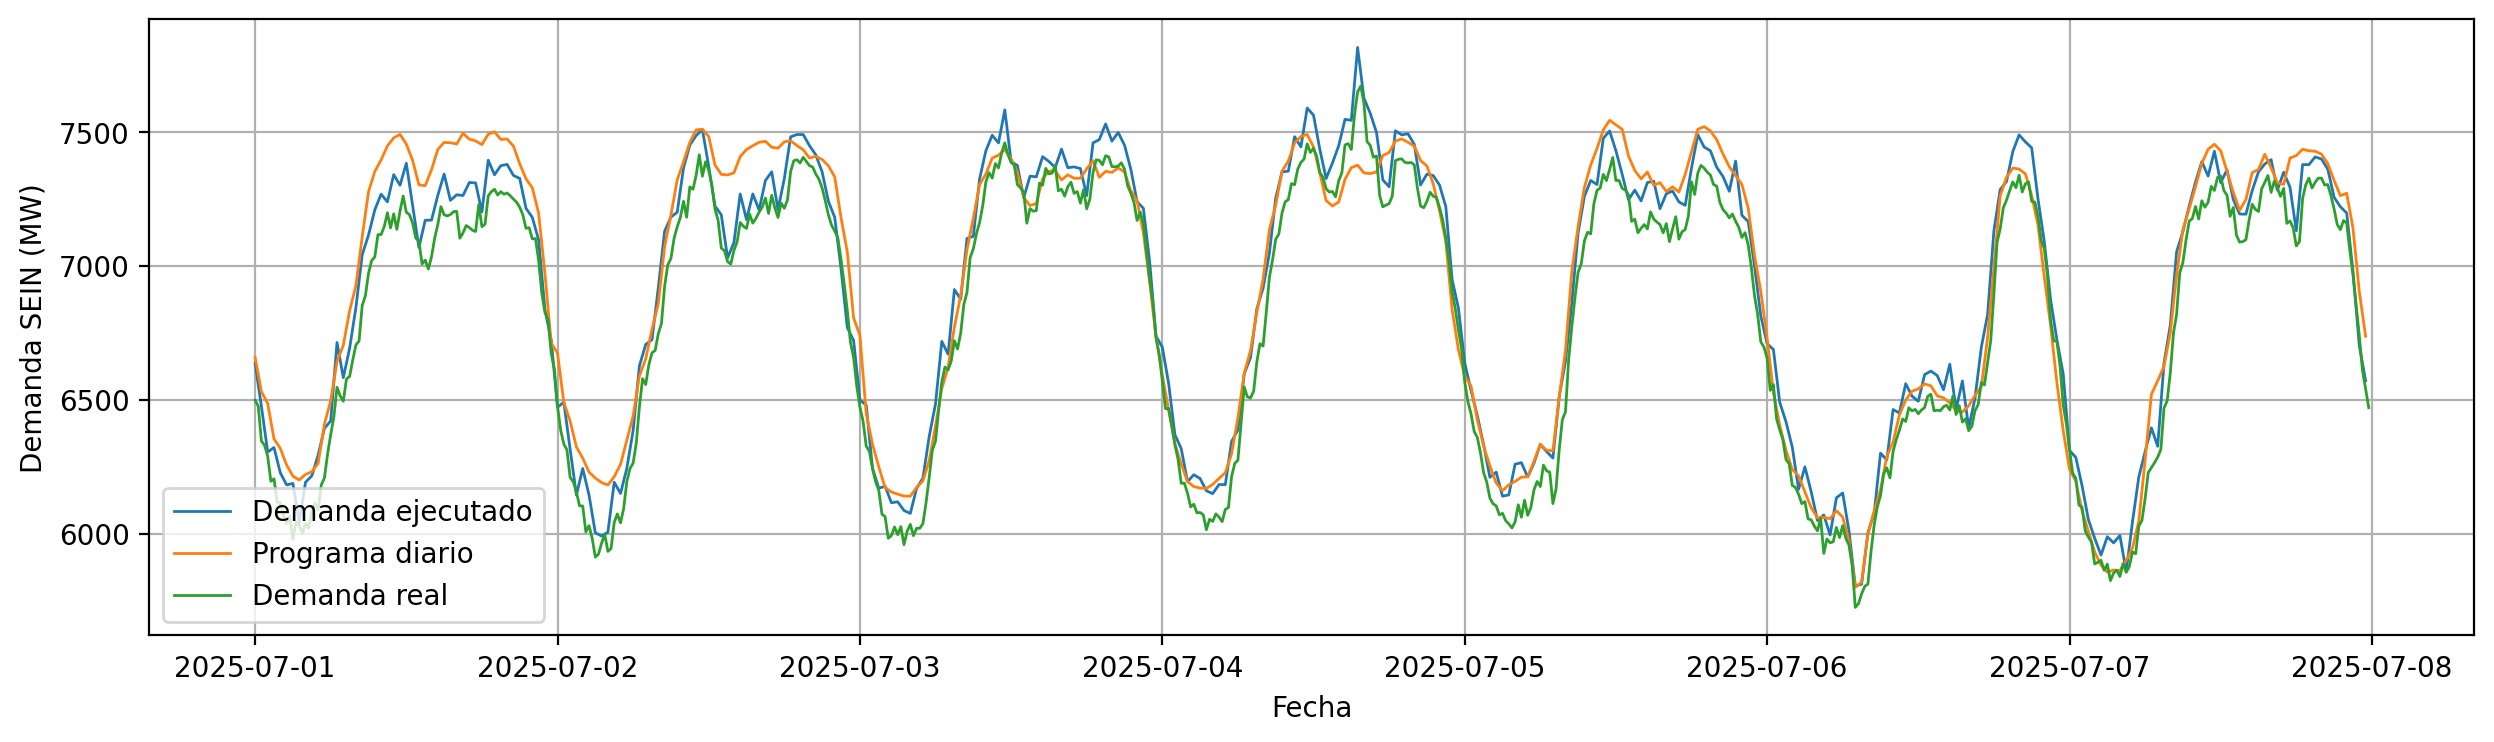

In [3]:
# Plot reprograma
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
fig.set_dpi(200)

start_date_plot = "2025-07-01"
end_date_plot = "2025-07-07"

ax.plot(
    df_ejecutado.loc[start_date_plot: end_date_plot],
    label=["Demanda ejecutado"],
    linewidth=1,
)

ax.plot(
    df_prog_dia.loc[start_date_plot: end_date_plot],
    label=["Programa diario"],
    linewidth=1,
)

ax.plot(
    df_demanda_real.loc[start_date_plot: end_date_plot],
    label=["Demanda real"],
    linewidth=1,
)

ax.set_ylabel("Demanda SEIN (MW)")
ax.set_xlabel("Fecha")

ax.legend()
ax.grid()

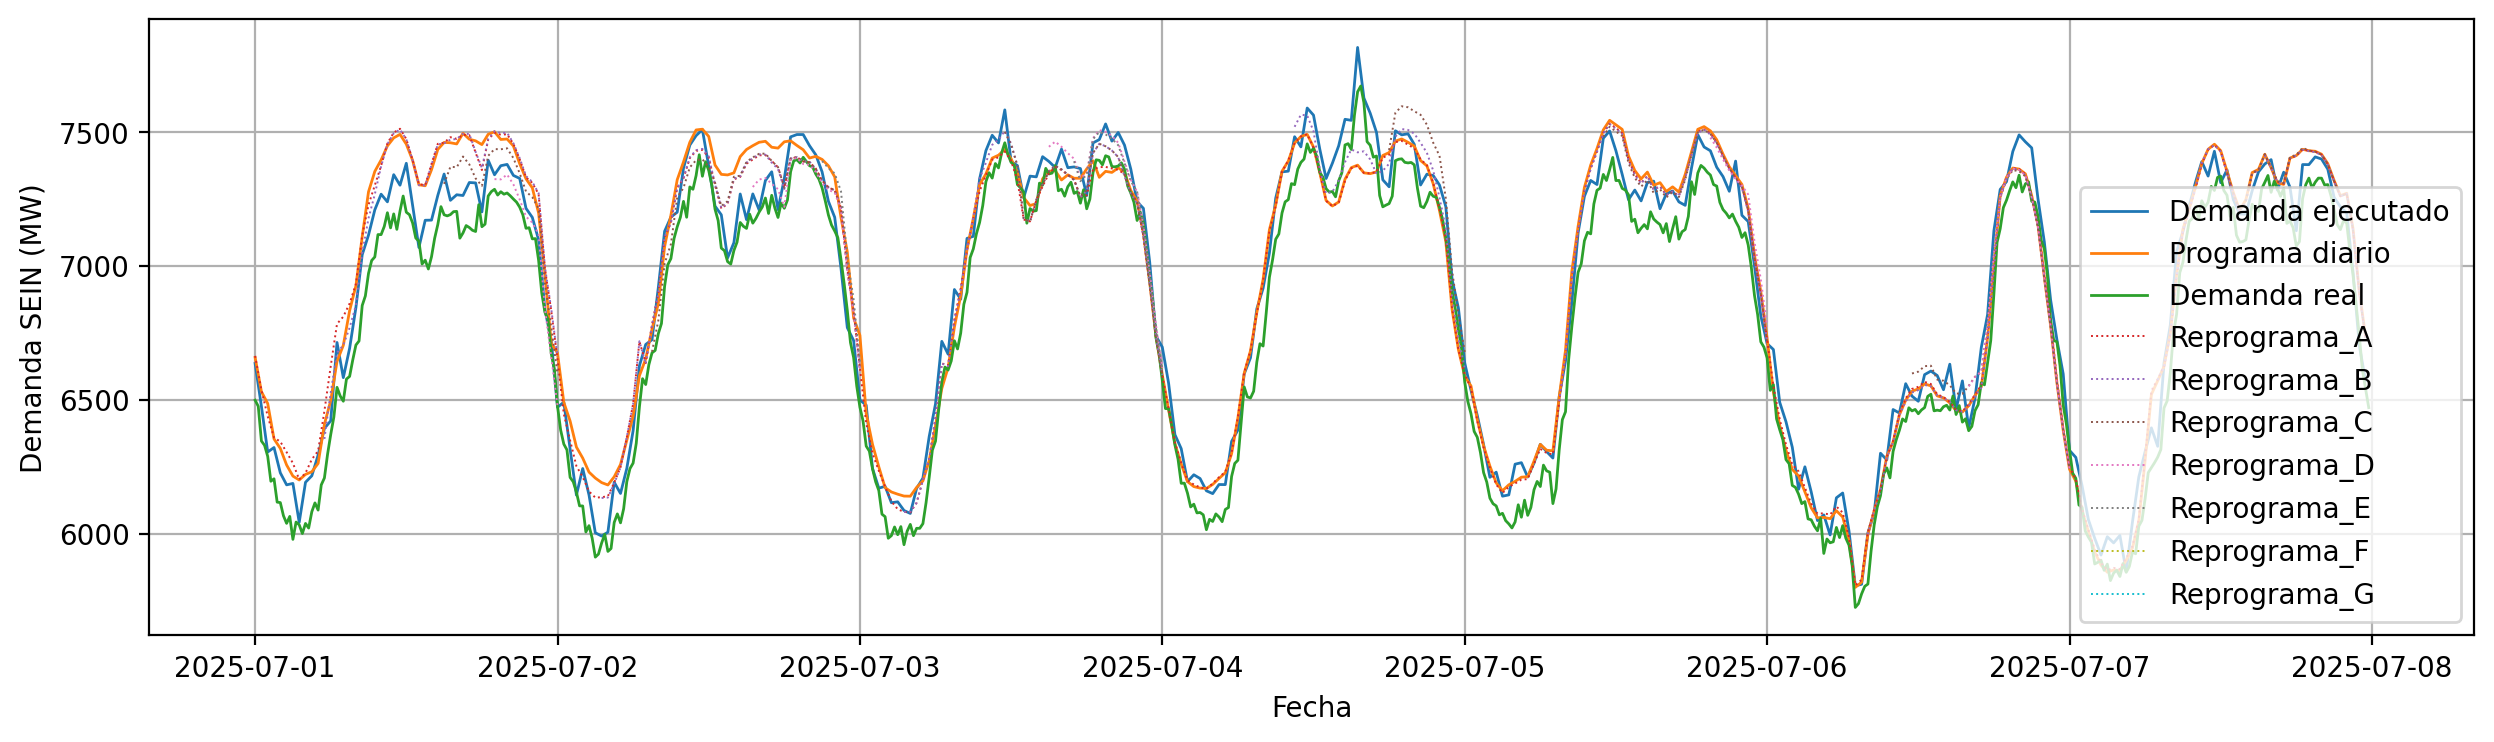

In [4]:
# Plot reprograma
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
fig.set_dpi(200)

start_date_plot = "2025-07-01"
end_date_plot = "2025-07-07"

ax.plot(
    df_ejecutado.loc[start_date_plot: end_date_plot],
    label=["Demanda ejecutado"],
    linewidth=1,
)

ax.plot(
    df_prog_dia.loc[start_date_plot: end_date_plot],
    label=["Programa diario"],
    linewidth=1,
)

ax.plot(
    df_demanda_real.loc[start_date_plot: end_date_plot],
    label=["Demanda real"],
    linewidth=1,
)

ax.plot(
    df_reprog_dia.loc[start_date_plot: end_date_plot],
    label=[f"Reprograma_{i}" for i in df_reprog_dia.columns],
    linestyle=":",
    linewidth=0.7,
)
ax.set_ylabel("Demanda SEIN (MW)")
ax.set_xlabel("Fecha")

ax.legend()
ax.grid()

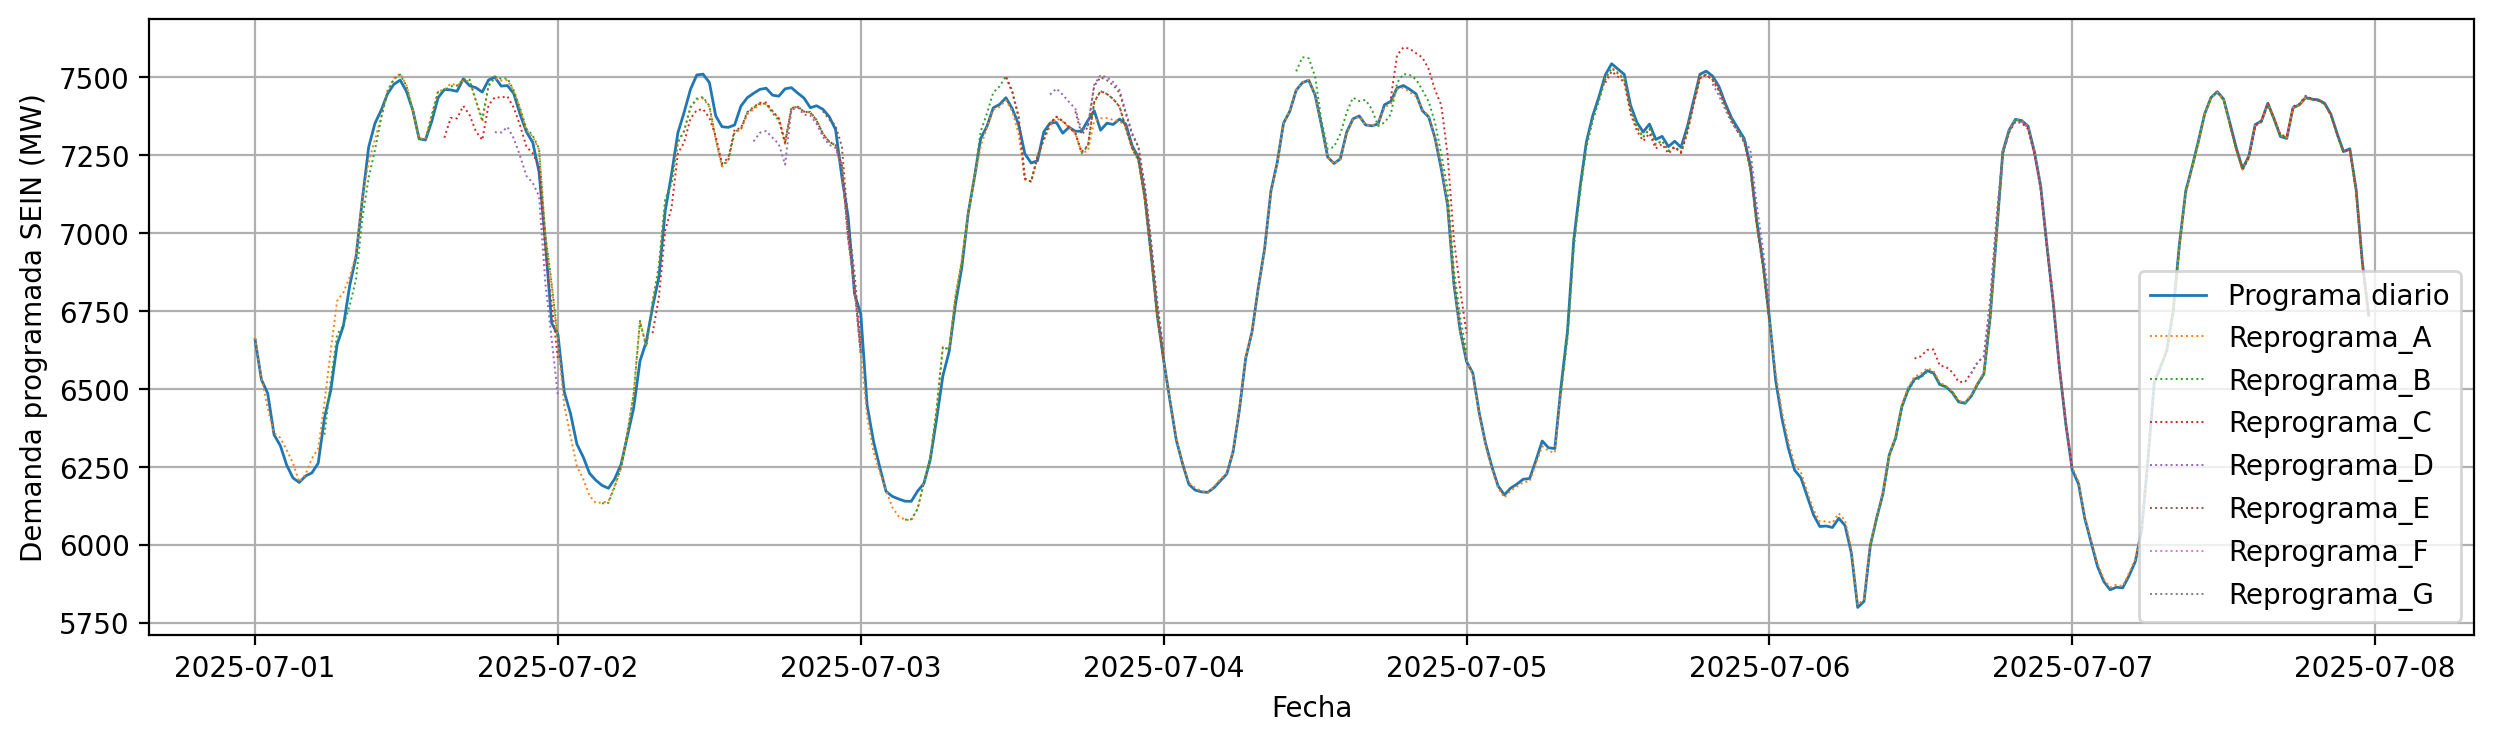

In [5]:
# Plot reprograma
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
fig.set_dpi(200)

start_date_plot = "2025-07-01"
end_date_plot = "2025-07-07"

ax.plot(
    df_prog_dia.loc[start_date_plot: end_date_plot],
    label=["Programa diario"],
    linewidth=1,
)

ax.plot(
    df_reprog_dia.loc[start_date_plot: end_date_plot],
    label=[f"Reprograma_{i}" for i in df_reprog_dia.columns],
    linestyle=":",
    linewidth=0.7,
)
ax.set_ylabel("Demanda programada SEIN (MW)")
ax.set_xlabel("Fecha")

ax.legend()
ax.grid()

### Error metrics

In [24]:
# Errors demanda real vs demanda ejecutado

# Resample to 15min
df_ejecutado_15min = df_ejecutado.resample("15min").interpolate("linear")
df_ejecutado_15min = df_ejecutado_15min.reindex(
    pd.date_range(
        df_demanda_real.index[0],
        df_demanda_real.index[-1],
        freq="15min",
    ),
).bfill()
df_ejecutado_15min.index.name = "timestamp"

# Calculate metrics
result_mae = mean_absolute_error(
    df_demanda_real["demanda_real"], df_ejecutado_15min["demanda_ejecutado"],
)
result_rmse = root_mean_squared_error(
    df_demanda_real["demanda_real"], df_ejecutado_15min["demanda_ejecutado"],
)
result_mse = mean_squared_error(
    df_demanda_real["demanda_real"], df_ejecutado_15min["demanda_ejecutado"],
)
result_mape = mean_absolute_percentage_error(
    df_demanda_real["demanda_real"], df_ejecutado_15min["demanda_ejecutado"],
)
print("Demanda ejecutado:")
print(f"MAE: {result_mae:.2f}")
print(f"RMSE: {result_rmse:.2f}")
print(f"MSE: {result_mse:.0f}")
print(f"MAPE: {result_mape*100:.2f}%")

Demanda ejecutado:
MAE: 93.58
RMSE: 109.80
MSE: 12055
MAPE: 1.38%


In [25]:
# Errors demanda real vs programa diario

# Resample to 15min
df_prog_dia_15min = df_prog_dia.resample("15min").interpolate("linear")
df_prog_dia_15min = df_prog_dia_15min.reindex(
    pd.date_range(
        df_demanda_real.index[0],
        df_demanda_real.index[-1],
        freq="15min",
    ),
).bfill()
df_prog_dia_15min.index.name = "timestamp"

# Calculate metrics
result_mae = mean_absolute_error(
    df_demanda_real["demanda_real"], df_prog_dia_15min["prog_dia"],
)
result_rmse = root_mean_squared_error(
    df_demanda_real["demanda_real"], df_prog_dia_15min["prog_dia"],
)
result_mse = mean_squared_error(
    df_demanda_real["demanda_real"], df_prog_dia_15min["prog_dia"],
)
result_mape = mean_absolute_percentage_error(
    df_demanda_real["demanda_real"], df_prog_dia_15min["prog_dia"],
)
print("Programa diario de operacion:")
print(f"MAE: {result_mae:.2f}")
print(f"RMSE: {result_rmse:.2f}")
print(f"MSE: {result_mse:.0f}")
print(f"MAPE: {result_mape*100:.2f}%")

Programa diario de operacion:
MAE: 137.60
RMSE: 174.96
MSE: 30612
MAPE: 2.05%


In [26]:
# Resample to 15min
df_reprog_dia_15min = df_reprog_dia.resample("15min").interpolate(
    "linear", limit=1, limit_direction="backward",
)

df_reprog_dia_15min = df_reprog_dia_15min.reindex(
    pd.date_range(
        df_demanda_real.index[0],
        df_demanda_real.index[-1],
        freq="15min",
    ),
).bfill(limit=1, limit_area="inside")

df_reprog_dia_15min.index.name = "timestamp"
df_reprog_dia_15min.iloc[0] = df_reprog_dia_15min.iloc[1]

# Reprogramas
reprograma_versions = df_reprog_dia_15min.columns.to_list()
for version in reprograma_versions:
    df_demanda_real_reprog = pd.merge(
        df_demanda_real["demanda_real"],
        df_reprog_dia_15min[version],
        how="left",
        on="timestamp",
    ).dropna()

    # Calculate metrics
    result_mae = mean_absolute_error(
        df_demanda_real_reprog["demanda_real"], df_demanda_real_reprog[version],
    )
    result_rmse = root_mean_squared_error(
        df_demanda_real_reprog["demanda_real"], df_demanda_real_reprog[version],
    )
    result_mse = mean_squared_error(
        df_demanda_real_reprog["demanda_real"], df_demanda_real_reprog[version],
    )
    result_mape = mean_absolute_percentage_error(
        df_demanda_real_reprog["demanda_real"], df_demanda_real_reprog[version],
    )
    print(f"Rerograma diario de operacion {version}"
          f" | {len(df_demanda_real_reprog)} records:")
    print(f"MAE: {result_mae:.2f}")
    print(f"RMSE: {result_rmse:.2f}")
    print(f"MSE: {result_mse:.0f}")
    print(f"MAPE: {result_mape*100:.2f}%\n")

Rerograma diario de operacion A | 103577 records:
MAE: 131.68
RMSE: 168.18
MSE: 28285
MAPE: 1.95%

Rerograma diario de operacion B | 78153 records:
MAE: 131.20
RMSE: 164.08
MSE: 26922
MAPE: 1.89%

Rerograma diario de operacion C | 48638 records:
MAE: 120.24
RMSE: 150.35
MSE: 22604
MAPE: 1.70%

Rerograma diario de operacion D | 21775 records:
MAE: 110.52
RMSE: 139.58
MSE: 19482
MAPE: 1.56%

Rerograma diario de operacion E | 6200 records:
MAE: 105.56
RMSE: 132.59
MSE: 17579
MAPE: 1.48%

Rerograma diario de operacion F | 1128 records:
MAE: 104.76
RMSE: 132.26
MSE: 17492
MAPE: 1.50%

Rerograma diario de operacion G | 155 records:
MAE: 136.88
RMSE: 163.30
MSE: 26667
MAPE: 1.96%



### Process data

In [27]:
df_reprog_dia_15min = df_reprog_dia_15min.melt(
    value_vars=["A", "B", "C", "D", "E", "F"], # Ignoring G, not enough data
    var_name="reprog_dia_version",
    value_name="reprog_dia",
    ignore_index=False,
).dropna().reset_index()

df_reprog_dia_15min = df_reprog_dia_15min.sort_values(
    ["timestamp", "reprog_dia_version"],
).drop_duplicates(subset="timestamp", keep="last")

df_reprog_dia_15min = df_reprog_dia_15min.set_index("timestamp")
df_reprog_dia_15min = df_reprog_dia_15min.reindex(
    pd.date_range(
        df_demanda_real.index[0],
        df_demanda_real.index[-1],
        freq="15min",
    ),
)

nan_mask = df_reprog_dia_15min["reprog_dia"].isna().values

# Replace nan values of reprograma with programa
df_reprog_dia_15min.loc[nan_mask, "reprog_dia"] = (
    df_prog_dia_15min.loc[nan_mask, "prog_dia"]
)

df_reprog_dia_15min.index.name = "timestamp"
df_reprog_dia_15min

,reprog_dia_version,reprog_dia
timestamp,,
2023-01-01 00:15:00,A,6166.156910
2023-01-01 00:30:00,A,6166.156910
2023-01-01 00:45:00,A,6140.048065
2023-01-01 01:00:00,A,6113.939220
2023-01-01 01:15:00,A,6087.665005
...,...,...
2025-12-31 23:00:00,E,6893.717490
2025-12-31 23:15:00,E,6756.729290
2025-12-31 23:30:00,E,6619.741090


In [29]:
# Merge dataframes and export dataset to a csv file
dataset = reduce(
    lambda x, y: pd.merge(x, y, how="left", on="timestamp"),
    [df_demanda_real, df_ejecutado_15min,
     df_prog_dia_15min, df_reprog_dia_15min[["reprog_dia"]]]
)
dataset.to_csv("data/dataset.csv")
dataset

,demanda_real,demanda_ejecutado,prog_dia,reprog_dia
timestamp,,,,
2023-01-01 00:15:00,6067.10602,6120.780000,6184.317140,6166.156910
2023-01-01 00:30:00,6045.22291,6120.780000,6184.317140,6166.156910
2023-01-01 00:45:00,5999.45558,6065.846695,6158.326410,6140.048065
2023-01-01 01:00:00,5965.07526,6010.913390,6132.335680,6113.939220
2023-01-01 01:15:00,5913.92014,5978.873195,6105.828795,6087.665005
...,...,...,...,...
2025-12-31 23:00:00,6864.23513,6927.542140,7110.844180,6893.717490
2025-12-31 23:15:00,6859.99152,6901.229125,6972.234775,6756.729290
2025-12-31 23:30:00,6816.54505,6874.916110,6833.625370,6619.741090


In [30]:
dataset.isna().sum()

demanda_real         0
demanda_ejecutado    0
prog_dia             0
reprog_dia           0
dtype: int64

### Processing result

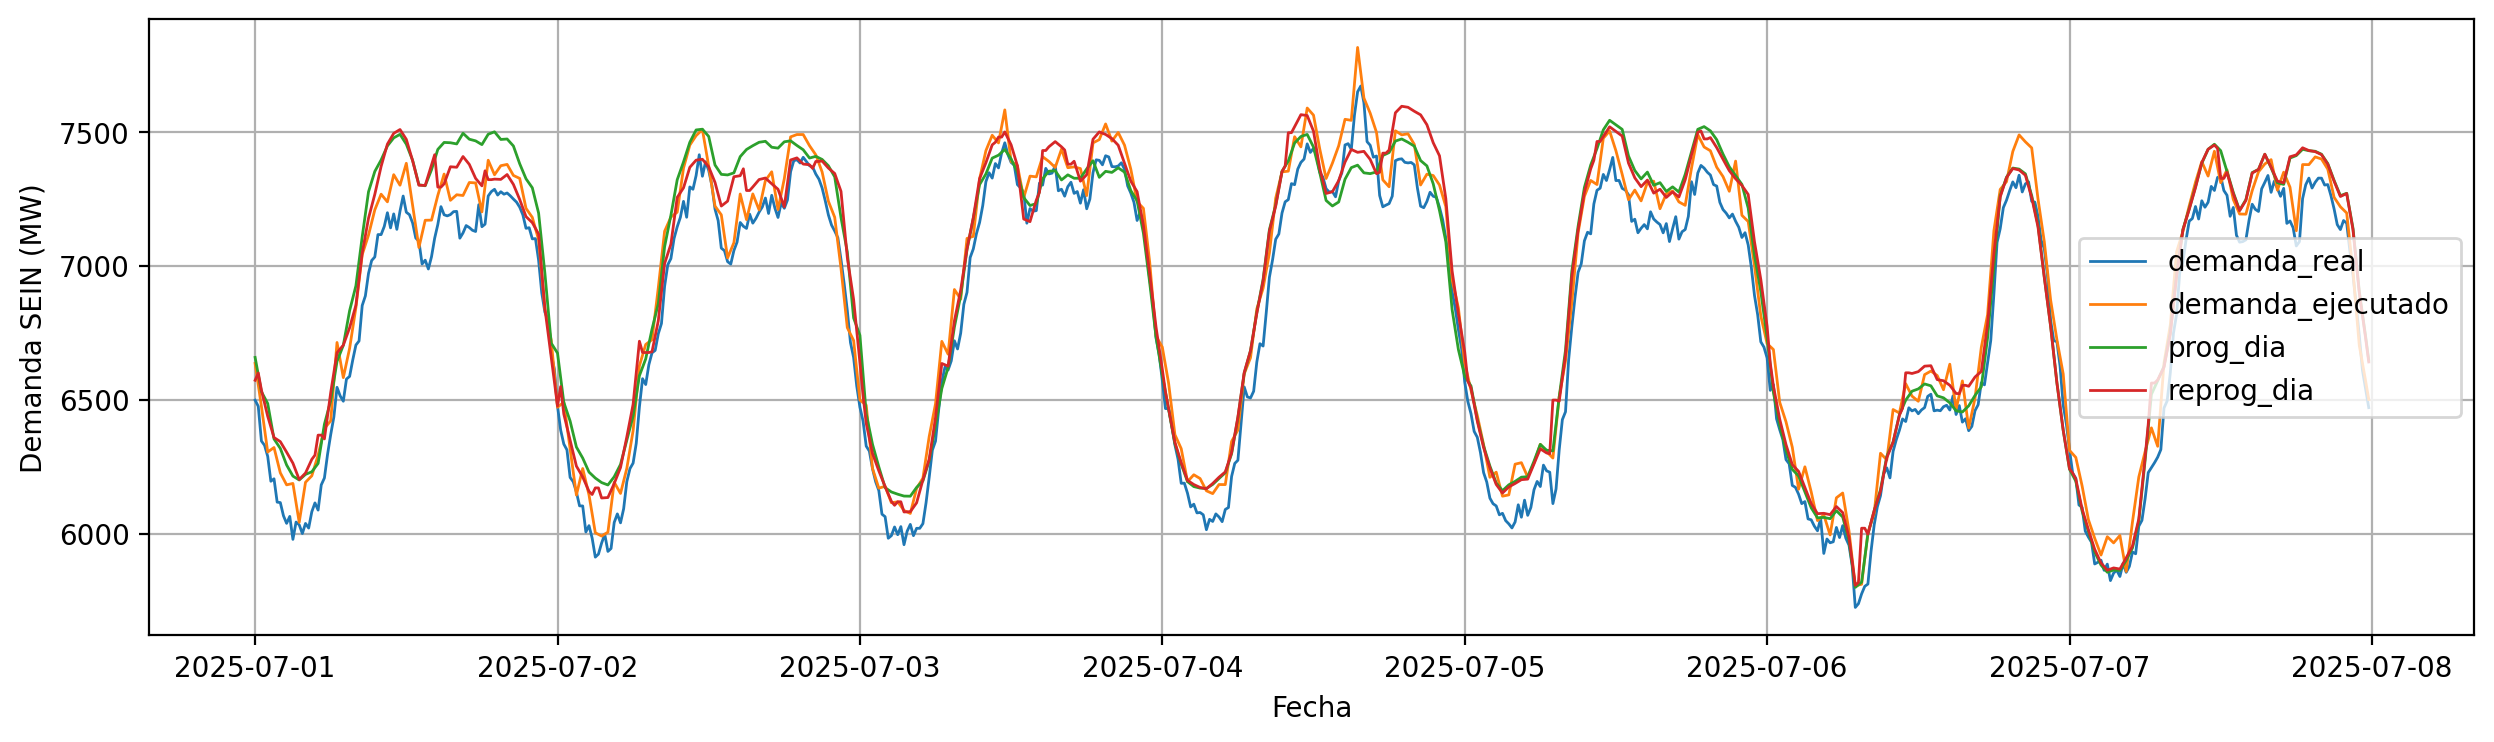

In [278]:
# Plot reprograma
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
fig.set_dpi(200)

start_date_plot = "2025-07-01"
end_date_plot = "2025-07-07"

ax.plot(
    dataset.loc[start_date_plot: end_date_plot],
    label=dataset.columns,
    linewidth=1,
)

ax.set_ylabel("Demanda SEIN (MW)")
ax.set_xlabel("Fecha")

ax.legend()
ax.grid()